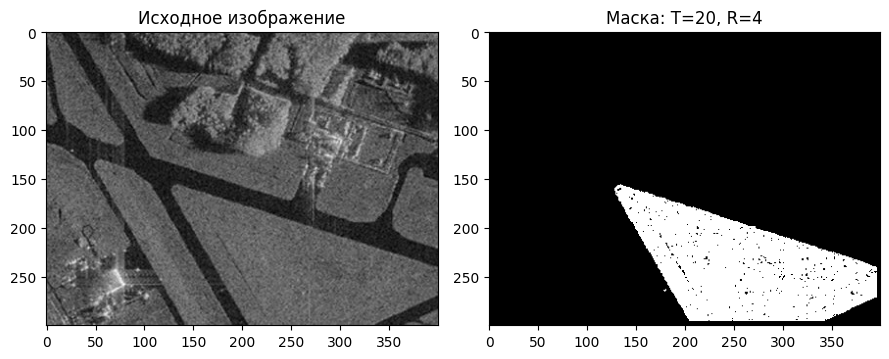

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])                                               
    if abs(av_val - img[point]) <= T:
        return True
    return False
def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i,j] == 0 and mask[i - r:i + r, j - r:j + r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask
    return mask * 255
images = {"Исходное изображение": image_gray}
seed_point = (250, 250)
r = 4
t = 20
mask = region_growing(image_gray, seed_point, homo_average, r, t)
images[f"Маска: T={t}, R={r}"] = mask
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
col = 0
for col, (key, img) in enumerate(images.items()):
    axs[col].imshow(img, cmap='gray')
    axs[col].set_title(key)
plt.tight_layout()
plt.show()

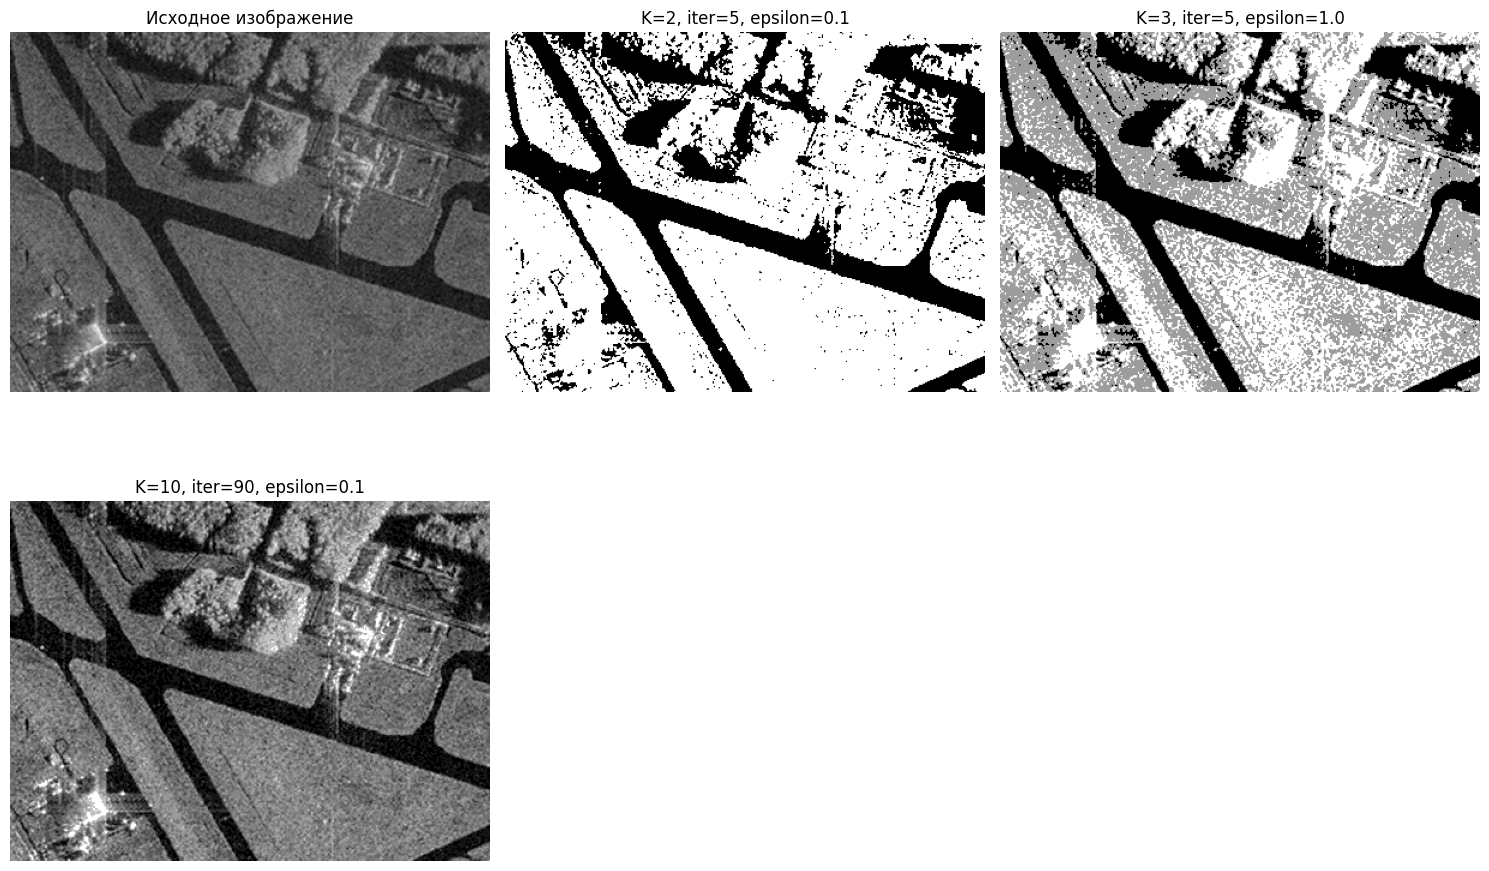

In [18]:
z = np.float32(image_gray.reshape((-1, 1)))

K1 = 2
K2 = 3
K3 = 10

criterii1 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5, 0.1) 
criterii2 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5, 1.0) 
criterii3 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 90, 0.1)

ret1, label1, c1 = cv2.kmeans(z, K1, None, criterii1, 10, cv2.KMEANS_RANDOM_CENTERS)
ret2, label2, c2 = cv2.kmeans(z, K2, None, criterii2, 10, cv2.KMEANS_RANDOM_CENTERS)
ret3, label3, c3 = cv2.kmeans(z, K3, None, criterii3, 50, cv2.KMEANS_RANDOM_CENTERS)

c1 = np.uint8(c1)
res1 = c1[label1.flatten()].reshape((image_gray.shape))
c2 = np.uint8(c2)
res2 = c2[label2.flatten()].reshape((image_gray.shape))
c3 = np.uint8(c3)
res3 = c3[label3.flatten()].reshape((image_gray.shape))

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(res1, cmap='gray')
plt.title(f'K={K1}, iter=5, epsilon=0.1')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(res2, cmap='gray')
plt.title(f'K={K2}, iter=5, epsilon=1.0')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(res3, cmap='gray')
plt.title(f'K={K3}, iter=90, epsilon=0.1')
plt.axis('off')

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(534.5), np.float64(526.5), np.float64(-0.5))

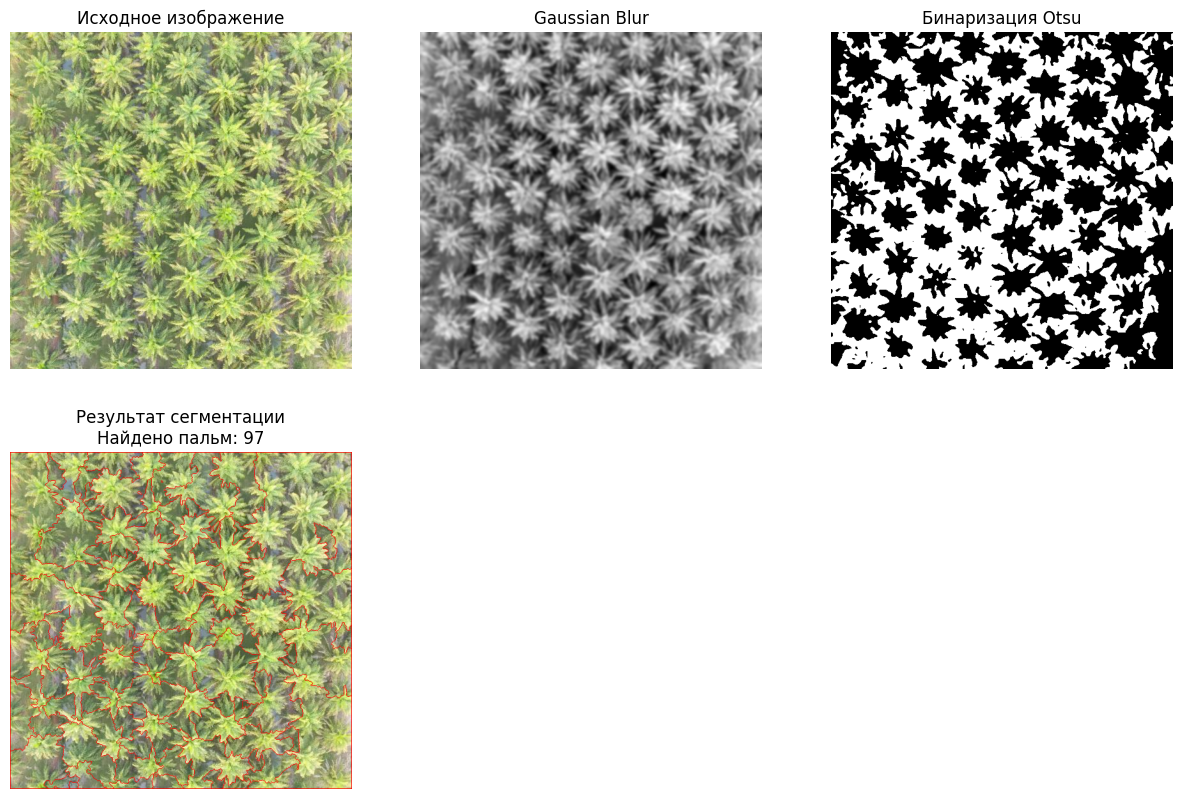

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

palm = cv2.imread('palm_1.jpg')
palm_rgb = cv2.cvtColor(palm, cv2.COLOR_BGR2RGB)
palm_gray = cv2.cvtColor(palm, cv2.COLOR_BGR2GRAY)
palm_gb = cv2.GaussianBlur(palm_gray, (11, 11), 0)
ret, thresh = cv2.threshold(palm_gb, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret, sure_fg = cv2.threshold(dist, 0.58 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
markers = cv2.watershed(palm, markers.astype(np.int32))

palm_count = len(np.unique(markers)) - 1 # -1 для исключения фона

palm_result = palm_rgb.copy()
palm_result[markers == -1] = [255, 0, 0] 
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(palm_rgb)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(palm_gb, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(thresh, cmap='gray')
plt.title('Бинаризация Otsu')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(palm_result)
plt.title(f'Результат сегментации\nНайдено пальм: {palm_count}')
plt.axis('off')